         network: BW
         station: RJOB
        location: 
         channel: EHZ
       starttime: 2009-08-24T00:20:03.000000Z
         endtime: 2009-08-24T00:20:32.990000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 3000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 6, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 4096, 'filesize': 73728})


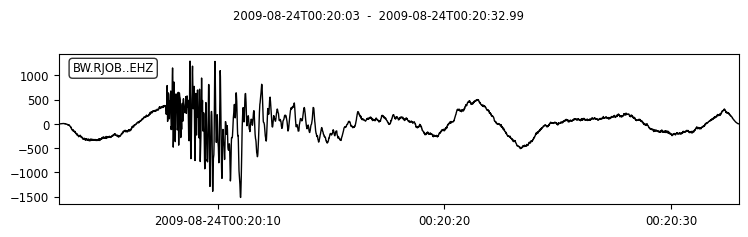

In [2]:
from obspy import read
# reading seismogram
st = read('BW.RJOB.2009.08.mseed')
tr = st[0]
stats = tr.stats
print(stats)

# accessing data
start = stats.starttime
dt = stats.delta
data = tr.data
times = tr.times()

# plot seismogram
tr.plot()
st.plot(outfile='BW.RJOB.2009.08.png')

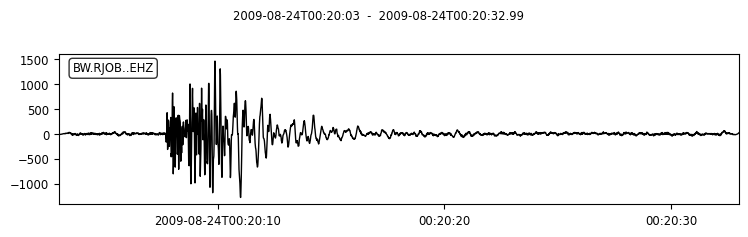

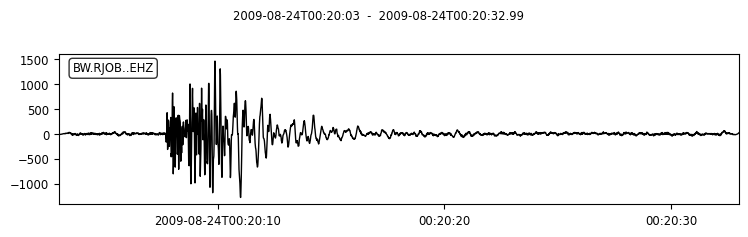

In [3]:
# filter
tr_filt = tr.copy()
tr_filt.filter('highpass', freq=1, corners=2, zerophase=True)

# detrend
from obspy.signal import detrend
tr_detrend = tr_filt.copy()
tr_detrend.data += 6000 + 4 * times ** 2
tr_detrend.data -= 0.1 * times ** 3 + 0.00001 * times ** 5
tr_detrend.detrend(type='spline', order=2, dspline=1000)
tr_detrend.plot()

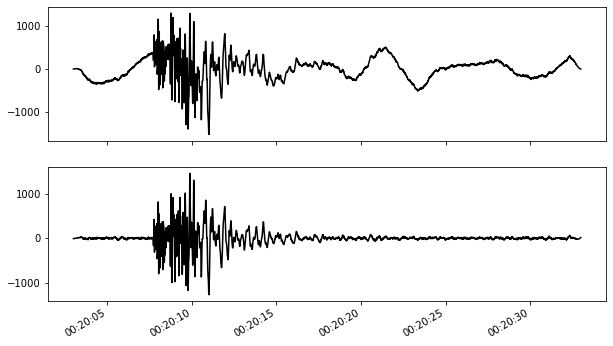

In [5]:
import matplotlib.pyplot as plt
#plot with date format
times = tr.times('matplotlib')
fig, ax = plt.subplots(2, 1, figsize=[10, 6], sharex=True)
ax[0].plot(times, data, '-k')
ax[1].plot(times, tr_filt.data, '-k')
ax[1].xaxis_date()
fig.autofmt_xdate()
plt.show()